In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
pd.options.display.float_format = '{:.3f}'.format

## Loading the data

In [2]:
url = 'https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv'
df = pd.read_csv(url, index_col=0)
df.head(5)

,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
name,,,,,,,,,,
Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.000,34.000,NaN
Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.000,154.000,NaN
Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.000,39.000,NaN
Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.000,15.000,NaN
American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.000,61.000,NaN


In [3]:
root = 'https://raw.githubusercontent.com/ageron/handson-ml2/8958d538bdcdf29d329d9950bfc79034c29db724/datasets/housing/housing.csv'
housing = pd.read_csv(root)

In [4]:
housing.shape

(20640, 10)

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.230,37.880,41.000,880.000,129.000,322.000,126.000,8.325,452600.000,NEAR BAY
1,-122.220,37.860,21.000,7099.000,1106.000,2401.000,1138.000,8.301,358500.000,NEAR BAY
2,-122.240,37.850,52.000,1467.000,190.000,496.000,177.000,7.257,352100.000,NEAR BAY
3,-122.250,37.850,52.000,1274.000,235.000,558.000,219.000,5.643,341300.000,NEAR BAY
4,-122.250,37.850,52.000,1627.000,280.000,565.000,259.000,3.846,342200.000,NEAR BAY


# Exploratory Data Analysis (EDA)

## Quick Look at the Data Structure

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
 housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000,20640.000,20640.000,20640.000,20433.000,20640.000,20640.000,20640.000,20640.000
mean,-119.570,35.632,28.639,2635.763,537.871,1425.477,499.540,3.871,206855.817
std,2.004,2.136,12.586,2181.615,421.385,1132.462,382.330,1.900,115395.616
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.000,0.500,14999.000
25%,-121.800,33.930,18.000,1447.750,296.000,787.000,280.000,2.563,119600.000
50%,-118.490,34.260,29.000,2127.000,435.000,1166.000,409.000,3.535,179700.000
75%,-118.010,37.710,37.000,3148.000,647.000,1725.000,605.000,4.743,264725.000
max,-114.310,41.950,52.000,39320.000,6445.000,35682.000,6082.000,15.000,500001.000


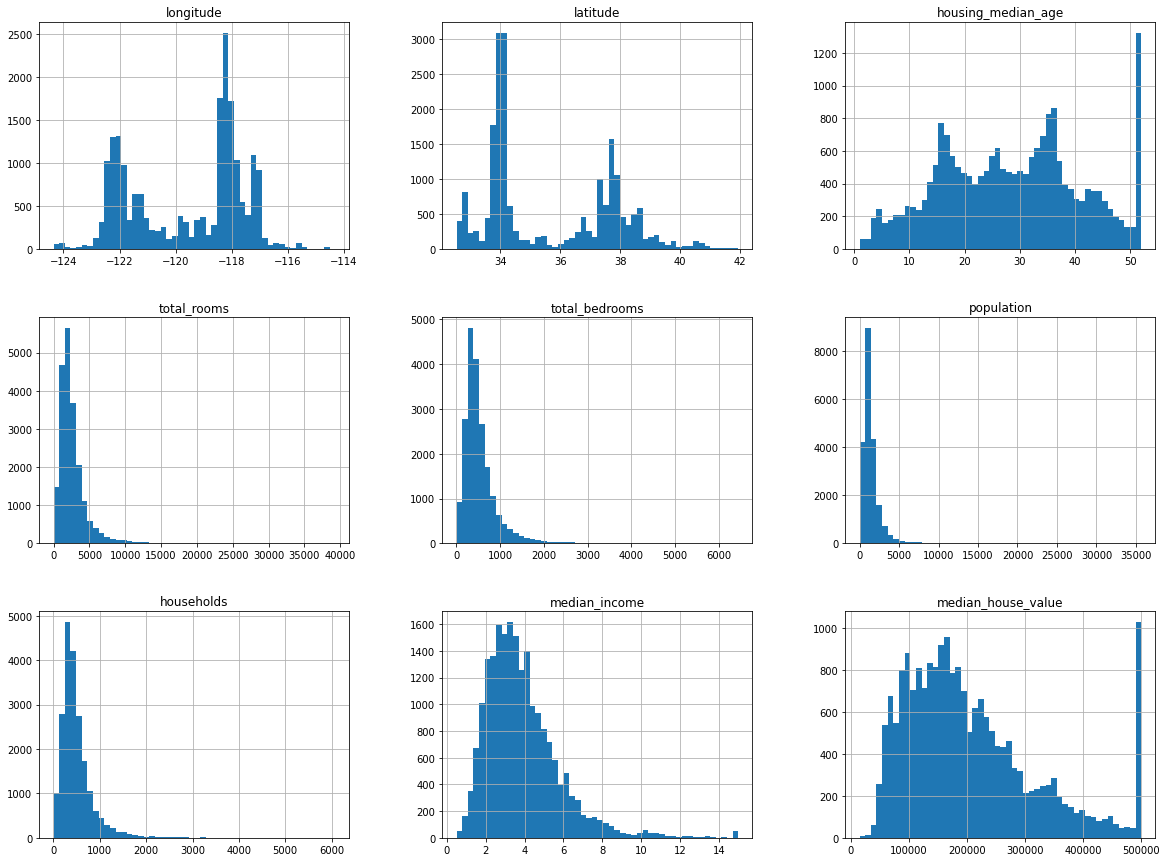

In [9]:
%matplotlib inline
housing.hist(bins = 50, figsize = (20, 15))
plt.show()

## Creating a Test Set

In [10]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(len(train_set))
print(len(test_set))

16512
4128


### To consider:
***
- Median income is a very a important attribute to predict median housing prices
- It is important to ensure that the test set is representative of the various categories of incomes in the whole dataset
- `pd.cut()` is commonly used for binning or grouping continuous data into discrete intervals or "bins". This can be very useful for tasks like creating histograms, analyzing data distribution, or converting continuous data into categorical variables.
---

In this case, "Stratified Sampling" is required, which refers to a technique of selecting a subset of data from a DataFrame in a way that maintains the same distribution of certain categorical variables as the original dataset. This is particularly useful when you want to create a representative sample that accurately reflects the distribution of a specific categorical variable in your data.

<AxesSubplot:>

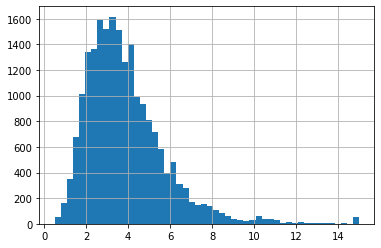

In [11]:
housing["median_income"].hist(bins = 50)

In [12]:
housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins = [0.0, 1.5, 3.0, 4.5, 6.0, np.inf], 
                               labels = [1, 2, 3, 4, 5])

Text(0.5, 1.0, 'Income Categories')

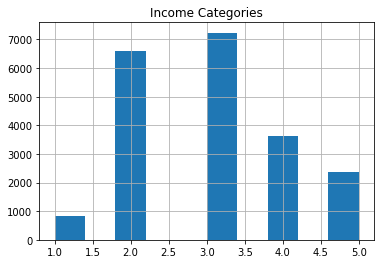

In [13]:
housing["income_cat"].hist()
plt.title('Income Categories')

The `split.split()` method generates the train-test splits. For each split, it returns indices for the training and testing data based on the stratification of the "income_cat" variable.

`train_index` and `test_index` are arrays of indices representing the rows in the dataset that will be part of the training and testing sets, respectively.

`strat_train_set` and `strat_test_set` are created by indexing the original housing DataFrame using the indices obtained from the split. *These new DataFrames represent the training and testing sets that have been stratified based on the "income_cat" variable.*

In [14]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Now it is removed the `income_cat` attribute so the data is back to its original
state:

In [15]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop(columns = 'income_cat', inplace = True)

## Discover and Visualize the Data to Gain Insights

In [16]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

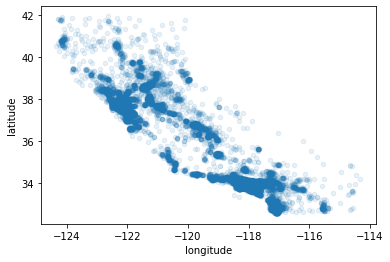

In [17]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)

## Notice:
---
The plot above looks just like *California!*

<img src = "California.jpg" width = "380">

### Getting more graphical insights:
---
The radius of each circle represents
the district’s population (option s), and the color represents the price (option c). We
will use a predefined color map (option cmap) called jet, which ranges from blue
(low values) to red (high prices)

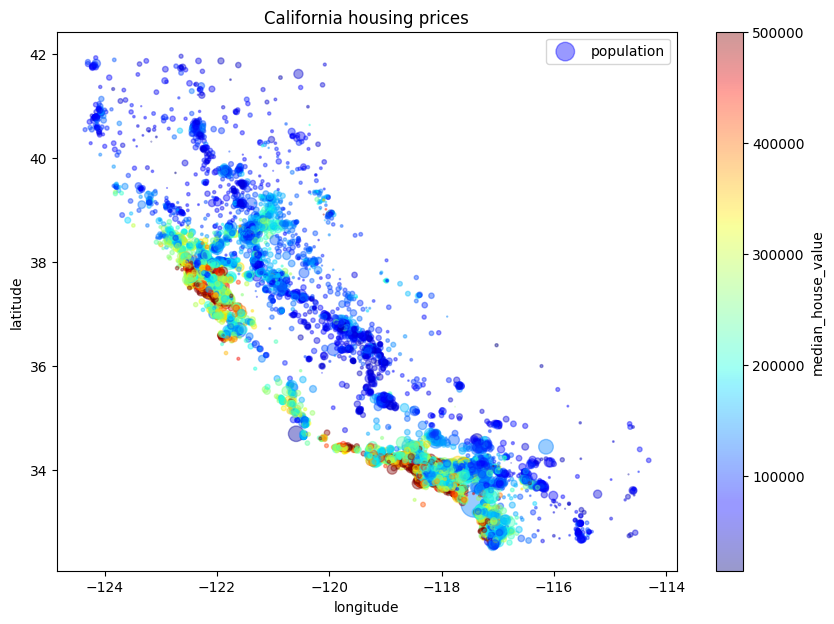

In [18]:
plt.rcParams.update(plt.rcParamsDefault)

housing.plot(kind = 'scatter', 
             x = 'longitude', 
             y = 'latitude', 
             alpha = 0.4, 
             s = housing['population'] / 100, 
             label = 'population', 
             figsize = (10, 7), c = 'median_house_value', 
             cmap = plt.get_cmap('jet'), 
             colorbar = True)

plt.title('California housing prices')
plt.show()


## Looking for Correlations

In [19]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000
median_income         0.687
total_rooms           0.135
housing_median_age    0.114
households            0.065
total_bedrooms        0.048
population           -0.027
longitude            -0.047
latitude             -0.143
Name: median_house_value, dtype: float64

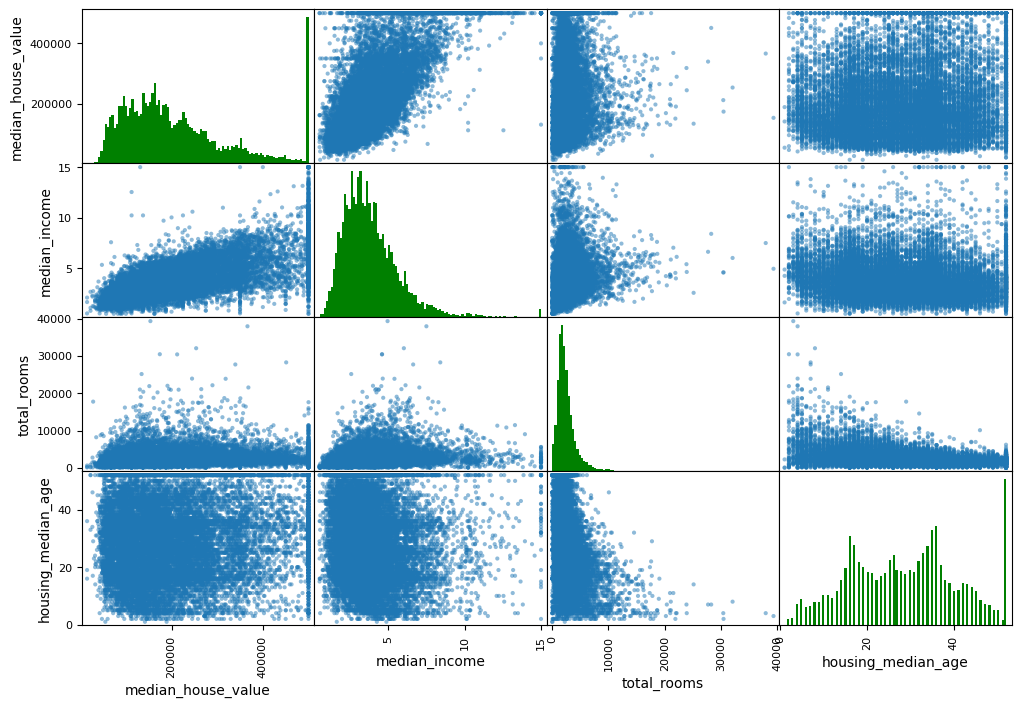

In [20]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
sm = scatter_matrix(housing[attributes], figsize = (12, 8), hist_kwds = {'bins': 100, 'color': 'green'}) 

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

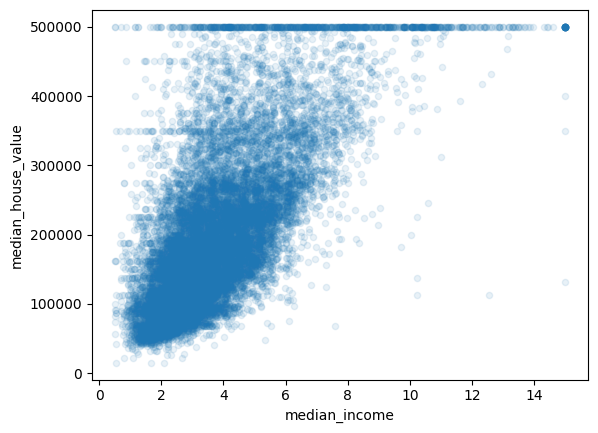

In [21]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)

## Experimenting with Attribute Combinations
---
- The price cap is clearly visible as a horizontal line at 500k usd (all median house value above 500k usd were set to 500k usd). But this plot reveals other less obvious straight lines: a horizontal line around 450k usd another around 350k usd, perhaps one around 280k usd.

- It was identified a few data quirks that may be to cleaned up before feeding the data to a Machine Learning algorithm, additionally, some interesting correlations between attributes were found, in particular with the target attribute. Finally, it can be noticed that some attributes have a tail-heavy distribution, so, it may be necesary to transform them.

### Getting more detailed data

In [22]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [23]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000
median_income               0.687
rooms_per_household         0.146
total_rooms                 0.135
housing_median_age          0.114
households                  0.065
total_bedrooms              0.048
population_per_household   -0.022
population                 -0.027
longitude                  -0.047
latitude                   -0.143
bedrooms_per_room          -0.260
Name: median_house_value, dtype: float64

# Preparing the Data for Machine Learning Algorithms

## Separating the predictors from the target values

In [24]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [25]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


## Data Cleaning
---
- `total_bedrooms` has son nan values. Let's replace them with 
- Scikit-Learn provides a handy class to take care of missing values: `SimpleImputer`.
- This class only can handle numeric values

In [26]:
imputer = SimpleImputer(strategy = 'median')

#### Using the `fit()` method of the imputer instance to the training data.

In [27]:
housing_num = housing.drop('ocean_proximity', axis = 1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

#### Using this “trained” imputer to transform the training set by replacing missing values by the learned medians.

In [28]:
x = imputer.transform(housing_num)
housing_tr = pd.DataFrame(x, columns = housing_num.columns)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


### Handling Text and Categorical Attributes

In [29]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [30]:
ordinal_encoder = OrdinalEncoder()

In [31]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [32]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### Note:
----
ML algorithms will assume that two nearby
values are more similar than two distant values. This may be fine in some cases (e.g.,
for ordered categories such as “bad”, “average”, “good”, “excellent”), but it is obviously
not the case for the ocean_proximity column.

To fix this issue, a common solution is
to create one binary attribute per category: one attribute equal to 1 when the category
is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is
“INLAND” (and 0 otherwise), and so on. This is called `one-hot encoding`, because
only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new
attributes are sometimes called `dummy` attributes. Scikit-Learn provides a `OneHotEn
coder` class to convert categorical values into one-hot vectors.

In [33]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [34]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [35]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]